<div style ="font-family:Trebuchet MS; background-color : #f8f0fa; border-left: 5px solid #1b4332; padding: 12px; border-radius: 50px 50px;">
    <h2 style="color: #1b4332; font-size: 48px; text-align: center;">
        <b>Step 1 in Feature Engineering: Handling Missing Values</b>
        <hr style="border-top: 2px solid #264653;">
    </h2>
    <h3 style="font-size: 14px; color: #264653; text-align: left; "><strong> I hope this is very helpful. let's started </strong></h3>
</div>

# Understanding Missing Values?
Missing data is a common issue in datasets that can significantly impact the performance of machine learning models. Before diving into handling missing data, it’s essential to understand the types of missing values you might encounter:

1. **Missing Completely at Random (MCAR):**
    - The missing data has no particular pattern and happens purely by chance.

    - Example: Imagine you’re conducting a survey, and some people accidentally skip a question because of a glitch in the online form. The missing answers are random and unrelated to any other information in the survey.


2. **Missing at Random (MAR):**

    -  The missing data is related to some other information in your dataset but not to the missing data itself.

    - Example: Suppose you’re collecting data on people's health, and you notice that people with higher incomes are less likely to share their 
    health information. The missing health data is linked to income, but not to the health data itself.

3. **Missing Not at Random (MNAR):**

    - The missing data is directly related to the value that is missing.
    
    - Example:  Imagine a survey about personal finances where people with very high debt might choose not to disclose their debt amount. The missing debt data is not random; it’s missing because of the debt itself.

# Handling Missing Values: Methods and Strategies

- we will practice along with the [titanic dataset](https://www.kaggle.com/datasets/brendan45774/test-file/data)

- we will use a msno python library, msno stands for "missingno," which is a Python library used for visualizing and analyzing missing data in datasets. It provides a range of functions to help identify, summarize, and manage missing values in dataframes, making it easier to address data quality issues.

In [51]:
# import libraries
import missingno as msno
import pandas as pd 
import matplotlib.pyplot as plt 

In [52]:
# load the dataset 
df = pd.read_csv('..\Data\Titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


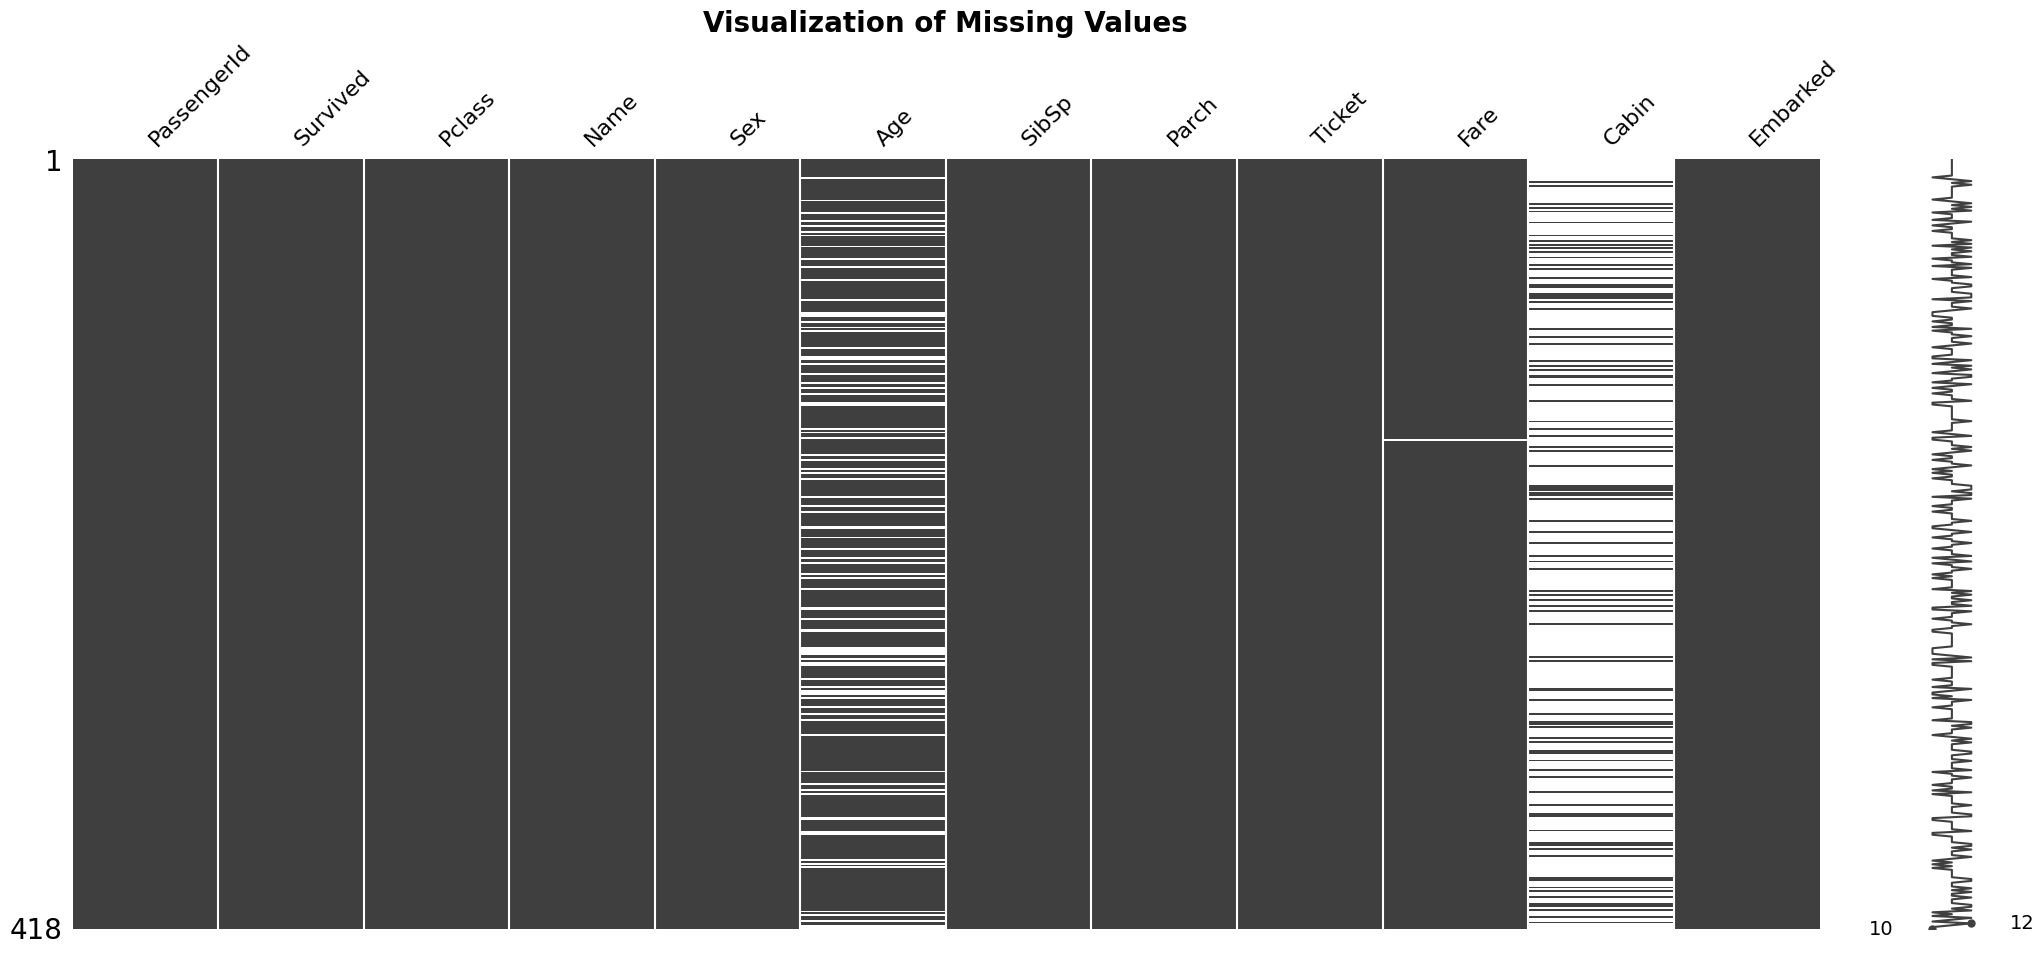

In [53]:
msno.matrix(df) # the white lines represent the missing values
plt.title("Visualization of Missing Values", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

In [54]:
# let's see all the missing values in our dataset 
print(df.isnull().sum())
print(df.shape)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
(418, 12)


## 1. Dropping Missing Values

- **Dropping Rows:** Remove rows with missing values if they are relatively few and do not significantly reduce the dataset.

- **Dropping Columns:** Remove columns with a high proportion of missing values, especially if the column is not crucial.

In [55]:
# Drop rows with any missing values
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
(87, 12)


In [56]:
# Drop columns with any missing values
df = pd.read_csv('..\Data\Titanic.csv')
df.dropna(inplace=True, axis=1)
print(df.isnull().sum())
print(df.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64
(418, 9)


now the dataset has no missing values. but we lost a lot of data. and this is not a good practice.

## 2. Mean/Median/Mode Imputation

- **Mean Imputation:** Replace missing values with the mean of the non-missing values in the column.

- **Median Imputation:** Replace missing values with the median, which is more robust to outliers.

- **Mode Imputation:** Replace missing values with the mode (most frequent value) for categorical data.

In [57]:
# mean imputaiton 
df = pd.read_csv('..\Data\Titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].mean())

# median imputation 
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# mode imputation
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])


print(df.isnull().sum())
print(df.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
(418, 12)


- this method is simple and easy to implement. 

- but it can introduce bias in the data. and it can also reduce the variance of the data.

## 3. Forward Fill/Backward Fill

- **Forward Fill:** Replace missing values with the last observed value.

- **Backward Fill:** Replace missing values with the next observed value.

In [58]:
# Forward Fill
df.fillna(method='ffill', inplace=True)

# Backward Fill
df.fillna(method='bfill', inplace=True)


C:\Users\hassa\AppData\Local\Temp\ipykernel_12712\538679559.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\hassa\AppData\Local\Temp\ipykernel_12712\538679559.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


- this methods is that they are fast but the disadvantage is that they are not accurate. 

## 4. Imputation with Constance

In [59]:
df.fillna(value=-9999, inplace=True)

this method is not recommended because it can introduce bias in the data.

## 5. K-Nearest Neighbors (KNN) Imputation

Use KNN to predict missing values based on the values of the nearest neighbors. This method is more complex and often used for numerical features.

In [60]:
from sklearn.impute import KNNImputer
df = pd.read_csv('..\Data\Titanic.csv')
imputer = KNNImputer(n_neighbors = 5)

numerical_col = ['Age', 'Fare']

df[numerical_col] = imputer.fit_transform(df[numerical_col])

print(df.isnull().sum())
print(df.shape)
 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
(418, 12)


this method is good for small datasets, but it is not recommended for large datasets as it is computationally expensive and time-consuming.

## 6. Imputation using Deep Learning Library — Datawig

This method works very well with categorical, continuous, and non-numerical features. Datawig is a library that learns ML models using Deep Neural Networks to impute missing values in the datagram.

first we need to install it 

```bash
pip install datawing
```

In [ ]:
import datawig

data = pd.read_csv('..\Data\Titanic.csv')

df_train, df_test = datawig.utils.random_split(data) # split the dataset into train and test

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Pclass','SibSp','Parch'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

# combine the imputed values with the original dataframe

data['Age'] = imputed['Age_imputed']

this method is quite accurate compared to other methods but it can be slow for large datasets

## Choosing the Right Method

The choice of method depends on:

- The type of data (numerical vs. categorical).

- The amount of missing data.

- The pattern of missingness.

- The impact on the analysis or model performance.